In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import ProjectFunctions as pf

In [16]:
## Variable initialization

In [17]:
G = 6.67408E-11

# position
posSun = np.array([0,0,0]) #m
posEarth = np.array([7.251E7,1.181E8,5.119E7])*1000 #m
posMoon = np.array([7.244E7,1.185E8,5.137E7])*1000 #m
posMars = np.array([-1.910E8,-1.294E8,-5.418E7])*1000 #m
posPluto = np.array([2.246E9,-4.186E9,-1.983E9])*1000 #m

# velocity
vSun = np.array([0,0,0]) #m/s
vEarth = np.array([-2.6E4,1.3E4,5.76E3]) #m/s
vMoon = np.array([-2.74E4,1.31E4,5.76E3]) #m/s
vMars = np.array([1.524E4,-1.57E4,-7.62E3]) #m/s
vPluto = np.array([5.046E0,1.756E0,-9.75E-1])*1000 #m/s

# mass
mE = 5.972E24 #kg
mS = 1.989E30 #kg
mM = 7.347E22 #kg
mMs = 0.642E24 #kg
mP = 0.0146E24 #kg

names = ['Sun', 'Earth', 'Moon', 'Mars', 'Pluto']

In [18]:
### Simulation variables

In [23]:
dayConsistency = 100

iterTime = int(365*dayConsistency)
h = int(84000/dayConsistency)
t = np.arange(0,iterTime,1)

print(iterTime,h)

3832500 2


## 2 Objects Testing

In [ ]:
# position
posArray = np.array([posSun,posEarth]).T

# velocity
vArray = np.array([vSun,vEarth]).T

# mass
massArray = np.array([[mS,mE]]).T

#acceleration 
accArray = pf.fofGrav(1,posArray, massArray)
accArray[1]

In [ ]:
v = np.zeros((iterTime,3,2))
r = np.zeros((iterTime,3,2))
a = np.zeros((iterTime,3,2))

v[0] = vArray
r[0] = posArray
a[0] = np.hstack((np.array([[0],[0],[0]]),np.reshape(accArray[1],(3,1))))

In [ ]:
for i in range(0,len(t)-1):
    v[i+1] = v[i] + h * a[i]
    r[i+1] = r[i] + (h/2)*(v[i] + v[i+1])
    
    #Get accelerations
    tempAccel = pf.fofGrav(0,r[i],massArray)[1]

    for k in range(posArray.shape[1]-1):
        tempAccel = np.vstack((tempAccel, pf.fofGrav(k+1,r[i],massArray)[1]))

    a[i+1] = tempAccel.T

Text(0.5, 0.874, 'Testing Eulers Method')

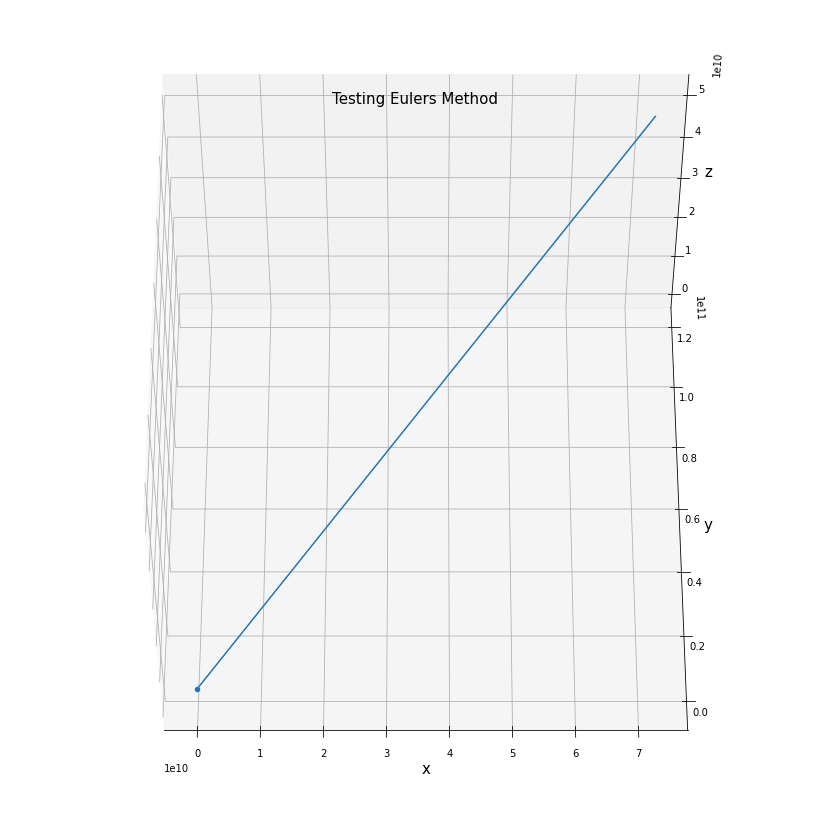

In [47]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')

# plot orbit
xPlot = r[:,0,1]
yPlot = r[:,1,1]
zPlot = r[:,2,1]

ax.plot(xPlot, yPlot, zPlot)

# plot spherical wireframe (of the radius of the orbit)
# u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
# rEarth = eucDist(np.array([[0],[0],[0]]), np.reshape(r[0,:,1],(3,1)))

# x = rEarth*np.cos(u)*np.sin(v)
# y = rEarth*np.sin(u)*np.sin(v)
# z = rEarth*np.cos(v)

# ax.plot_wireframe(x, y, z, color="r")

# plot the position of the sun
xPlot = r[0,0,0]
yPlot = r[0,1,0]
zPlot = r[0,2,0]

ax.scatter(xPlot, yPlot, zPlot)

ax.view_init(elev=55, azim=-90) #Change view parameters (spin along the azimuth)

ax.set_xlabel('x', fontsize = 15) #Assign label
ax.set_ylabel('y', fontsize = 15) #Assign label
ax.set_zlabel('z', fontsize = 15) #Assign label

ax.set_title('Testing Eulers Method', y=0.95, fontsize=15)

## n Object Testing

In [24]:
# position
posArray = np.array([posSun,posEarth,posMoon]).T

# velocity
vArray = np.array([vSun,vEarth,vMoon]).T

# mass
massArray = np.array([[mS,mE,mM]]).T

#acceleration 
accArray = pf.fofGrav(0,posArray,massArray)[1]

for i in range(posArray.shape[1]-1):
    accArray = np.vstack((accArray, pf.fofGrav(i+1,posArray,massArray)[1]))

accArray = accArray.T

In [25]:
nObjects = posArray.shape

v = np.zeros((iterTime,3,nObjects[1]))
r = np.zeros((iterTime,3,nObjects[1]))
a = np.zeros((iterTime,3,nObjects[1]))

v[0] = vArray
r[0] = posArray
a[0] = accArray

In [26]:
for i in range(0,len(t)-1):
    v[i+1] = v[i] + h * a[i]
    r[i+1] = r[i] + (h/2)*(v[i]+v[i+1])
    
    #Get accelerations
    tempAccel = pf.fofGrav(0,r[i],massArray)[1]

    for k in range(posArray.shape[1]-1):
        tempAccel = np.vstack((tempAccel, pf.fofGrav(k+1,r[i],massArray)[1]))

    a[i+1] = tempAccel.T

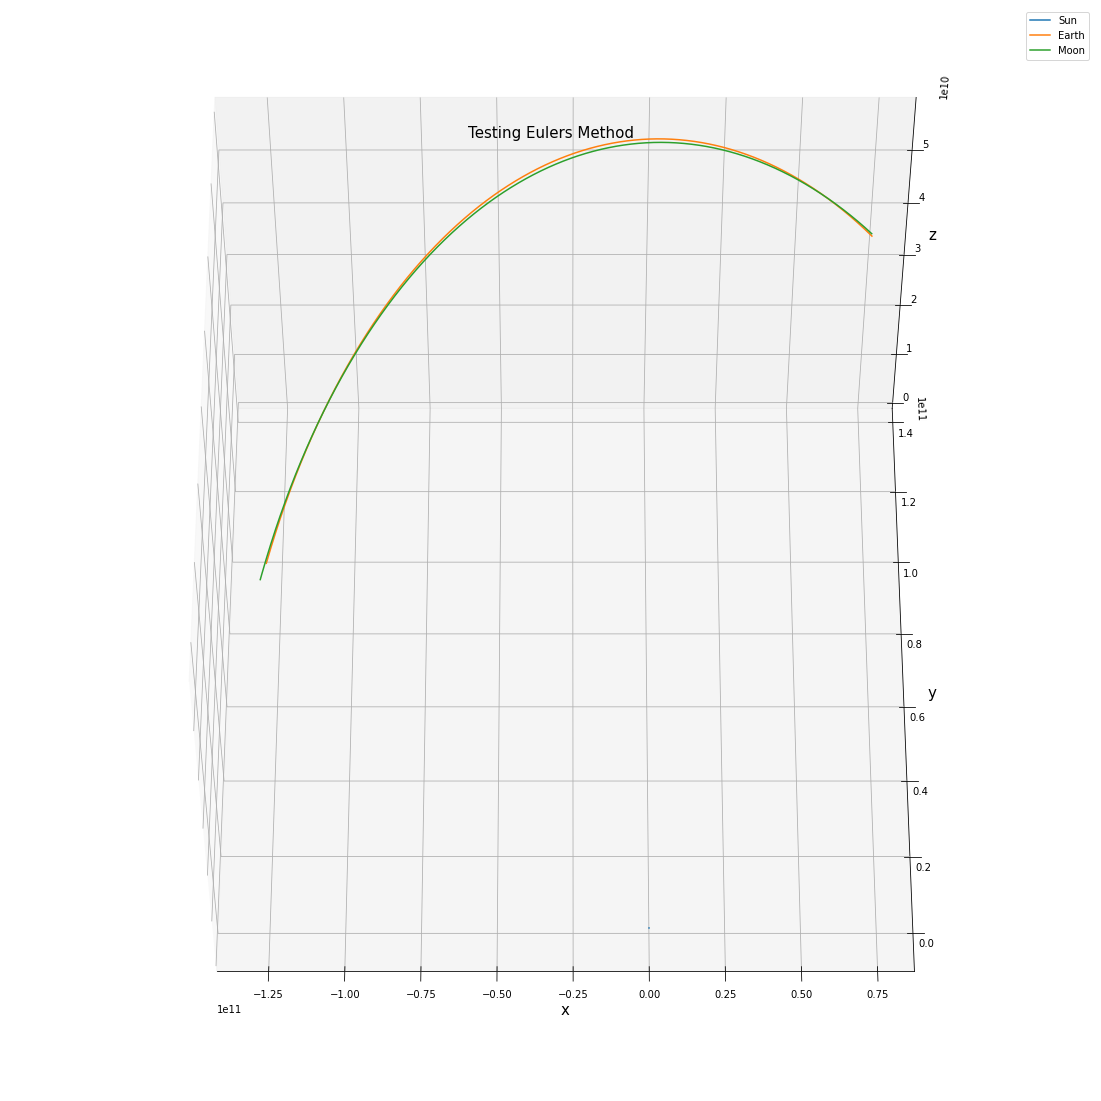

In [27]:
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(111, projection='3d')

for i in range(r[0].shape[1]):
    xPlot = r[:,0,i]
    yPlot = r[:,1,i]
    zPlot = r[:,2,i]

    ax.plot(xPlot, yPlot, zPlot, label = names[i])

# plot spherical wireframe (of the radius of the orbit)
# u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
# rEarth = eucDist(np.array([[0],[0],[0]]), np.reshape(r[0,:,1],(3,1)))

# x = rEarth*np.cos(u)*np.sin(v)
# y = rEarth*np.sin(u)*np.sin(v)
# z = rEarth*np.cos(v)

# ax.plot_wireframe(x, y, z, color="r")

ax.view_init(elev=55, azim=-90) #Change view parameters (spin along the azimuth)

ax.set_xlabel('x', fontsize = 15) #Assign label
ax.set_ylabel('y', fontsize = 15) #Assign label
ax.set_zlabel('z', fontsize = 15) #Assign label

ax.set_title('Testing Eulers Method', y=0.95, fontsize=15)

ax.legend()